Name: Adelin - Gabriel Mares 

Student ID: w1723210


# Application area review
## Robot navigation

“In order to operate in a cluttered environment, an autonomous vehicle should be able to detect and avoid obstacles”.(Matveev 2016). The robot should be able to detect obstacles and navigate around them while also choosing the shortest path to the desired destination. “Simulation tests deal with the robot reactive navigation strategy.” (Matveev 2016).  In order for the robot to know which path is the best path it would perform a series of simulations to know the optimal choice. “Global path planning is based on complete model of the environment and tries to find the best possible solution”. It would be harder for the robot to find the path in an unknown environment, so the robot must be able to analyse the environment in order to use shortest path finding algorithms.



# AI techniques
## A* path-finding algorithm
The goal is for a robot to reach a destination through the shortest path possible. Using this technique, the algorithm will search for unexplored locations in the graph, and when the goal is reached the algorithm stops. In my problem, using this technique I can have the robot find the shortest path to the destination. (The algorithm can find the optimal path for the boat to take to get to the fishing spot). A star algorithm is one of the best techniques to path finding. It is used in very complex problems and able to find the optimal solution efficiently. Since A star algorithm calculates the distance it is able to find the path without expanding too many noted. This means that this algorithm is not as expensive as other path finding algorithms. However, the performance of this algorithm is dependent on accuracy of heuristic algorithm used to compute function h(n).

## Newral Network for robot navigation
Neural Network system relies on biological nervous system similar to a brain processing information. It is made up of artificial neurons interconnecting one another and working together to produce a specific output. Neural networks are used in popular real-life applications such as facial expression-based applications, gesture recognition, finding the shortest route etc. For my robot navigation problem, the neural network would be useful in combination with the Q reinforcement learning method. Learning in the neural network can be supervised or unsupervised. Supervised learning uses classified pattern information, while unsupervised learning uses only minimum information without preclassification.(Janglova 2004). Using a neural network, means that that you have to consider the computational pawer available.  The more computational power the more data can be processed.

## Reinforcement Learning
"With supervised learning, and agent learns by passively observing example input/output pairs provided by a "teacher"."(Stuart 2021). With reinforcement learning, the agent is able to learn without a teacher. Using reinforcement learning(LR), the agent will receive rewards periodically depending on the actions it takes. Positive rewards will be given to the agent when it makes optimal choices and negative rewards when the agent makes non optimal options. The agent will make decisions based on the rewards, as it wants to maximize the expected sum of rewards. In a robot navigation problem, the agent will have to experiment and upon hitting obstacles and receiving negative rewards, the agent will learn that it should not hit the obstacles. This is because the agent is not told what it should do, it must learn everything by itself. But the advantage is that you don't need to tell the agent what it needs to do, it will learn it as long as the rewards are set correctly. In RL you must provide the correct reward signal otherwise the agent will not make the decisions you would want it to make. In complex environments with a hight number of actions, the agent will need more time experimenting compared to a simple environment with less actions. This may be a problem as it will require a high computational power. There are agents which can be left to train for minutes to hours or days to become perfect depending on how complex the problem might be.



## Reinforcement learning implementation
### Description
The problem will represent a robot which is able to control a boat on a lake to the perfect fishing spot. Assuming there are many obstacles on the lake, such as other boats on the lake, low bridges or land. The boat should be able to navigate and avoid the obstacles and get to the fishing spot by taking the shortest route.

The task will be done using the Q-learning system. The environment for this will consist of states, actions and rewards. The inputs for the agent will be the states and the rewards, which will then generate an action, as the agent takes actions based on the states and rewards. Each state is a situation at which the robot might be in, for example, the robot can be at row 5 column 6. This means that is this environment a combination of a row and column index represents a state. Each state will have a reward, and if it is an obstacle, the reward will be -100. If a robot is in a state with reward -100, it means that the robot hit an obstacle. The location of the fishing spot will have a reward of +100. Everything else will have a reward of -1. This means that whenever a robot goes from a state to another without reaching the goal or bumping into an obstacle it will receive reward -1. Since the goal of the agent is to maximize rewards if I would give rewards of +1, the robot may run in circles and accumulate a high reward count without reaching the goal. There are 4 actions the robot can take at a particular state (Up, Down, Left and Right). Each episode/trial, the agent will start at a random location that is not inside an obstacle and try reach the goal. This will teach the agent to get to the goal from any location. This is so that the boat can get to the fishing spot from any location on the lake.

During training, the agent will choose the greediest action to get to the goal 90% of the time. 10% of the time the agent will choose a non-greedy action in order to explore the environment and potentially find other paths to the goal. Upon moving to a new state, the agent will receive a reward and will calculate the temporal difference. The q-value will then be updated for the previous state and action pair. The q-values are used by the agent to make the greedy actions.


## Diagram


In [1]:
from IPython.display import Image
Image(url= "https://drive.google.com/uc?export=view&id=1OfPrs862w-7cx1XT-mxzbb-WXz9SQ9uR")

If the diagram is not shown, use this google drive link: https://drive.google.com/file/d/1OfPrs862w-7cx1XT-mxzbb-WXz9SQ9uR/view?usp=sharing

# Prototype implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Environment
The environment contains states, actions and rewards. 

In [3]:
rows = 11
columns = 11
fishing_spot = 1,1

The q-value is a combination of a state and an action. rows and columns will represent the states and the 3rd parameter will represent an action. The q-value represents the sum of all future rewards if a cetratin action is taken in a certain state.

In [4]:
q_values = np.zeros((rows, columns, 4))
actions = ['up', 'right', 'down', 'left']

Below an array of rewards is set and contains a list of states and their rewards. All states are set to -1.

The reward set to 100 is where the agent needs to go to.

This means that the best fishing spot is located at rewards [5,5]

In [5]:
rewards = np.full((rows, columns), -1)
rewards[fishing_spot] = 100

Next, the obstacles are defined. Here rewards are set to -100 as the agent is not supposed to bump into the obstacles. Each time an agent will hit an obstacle it will take a rewards of -100.

In [6]:
obstacle = {}
obstacle[0] = [i for i in range(0, 11)]
obstacle[1] = [0, 8, 10]
obstacle[2] = [0, 2, 3, 5, 6, 10]
obstacle[3] = [0, 10]
obstacle[4] = [0, 1, 4, 5, 6, 8,  10]
obstacle[5] = [0, 10]
obstacle[6] = [0, 2, 3, 5, 6, 10]
obstacle[7] = [0, 3, 10]
obstacle[8] = [0, 1, 3, 5, 6, 7, 9, 10]
obstacle[9] = [0, 10]
obstacle[10] = [i for i in range(0, 11)]

for row in range(0, 11):
  for col in obstacle[row]:
    rewards[row, col] = -100    

### Visual representations of the rewards list.

In [7]:
print(rewards)

[[-100 -100 -100 -100 -100 -100 -100 -100 -100 -100 -100]
 [-100  100   -1   -1   -1   -1   -1   -1 -100   -1 -100]
 [-100   -1 -100 -100   -1 -100 -100   -1   -1   -1 -100]
 [-100   -1   -1   -1   -1   -1   -1   -1   -1   -1 -100]
 [-100 -100   -1   -1 -100 -100 -100   -1 -100   -1 -100]
 [-100   -1   -1   -1   -1   -1   -1   -1   -1   -1 -100]
 [-100   -1 -100 -100   -1 -100 -100   -1   -1   -1 -100]
 [-100   -1   -1 -100   -1   -1   -1   -1   -1   -1 -100]
 [-100 -100   -1 -100   -1 -100 -100 -100   -1 -100 -100]
 [-100   -1   -1   -1   -1   -1   -1   -1   -1   -1 -100]
 [-100 -100 -100 -100 -100 -100 -100 -100 -100 -100 -100]]


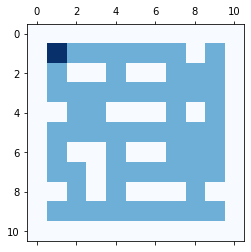

In [8]:
fig, ax = plt.subplots()
ax.matshow(rewards, cmap=plt.cm.Blues)

### Agent

* Get a random location where the agent will start at. This means that the boat can be at any location that is not an obstacle.

* Using the epsilon greedy algorithm the agent will choose the most greedy action 90% of the time, and 10% of the time it will choose a non greedy action in order to explore the environment.

* After moving to the new state, the agent will recieve a reward and update the q-value


In [9]:
def is_done(row, col):
  if rewards[row, col] == -1.:
    return False
  else:
    return True

def get_random_location():
  row = np.random.randint(rows)
  col = np.random.randint(columns)

  while is_done(row, col):
    row = np.random.randint(rows)
    col = np.random.randint(columns)
  return row, col


def get_action(row, col, epsilon):

  if np.random.random() < epsilon:
    return np.argmax(q_values[row, col])
  else:
    return np.random.randint(4)

def get_next_location(row, col, action):
  new_row = row
  new_column = col
  if actions[action] == 'up' and row > 0:
    new_row -= 1
  elif actions[action] == 'right' and col < columns - 1:
    new_column += 1
  elif actions[action] == 'down' and row < rows - 1:
    new_row += 1
  elif actions[action] == 'left' and col > 0:
    new_column -= 1
  return new_row, new_column


def get_path(row, col):
  if is_done(row, col):
    print("Boat is in obstacle, try another location.")
    return []
  else: 
    shortest_path = []
    shortest_path.append([row, col])
    while not is_done(row, col):
      action = get_action(row, col, 1.)
      row, col = get_next_location(row, col, action)
      shortest_path.append([row, col])
    return shortest_path

### Training

Using Q-Learning to train the agent


In [15]:
print("Loading...")
epsilon = 0.9 
gamma = 0.9 
learning_rate = 0.9 

reward_location = []
for episode in range(200):
  row, col = get_random_location()

  while not is_done(row, col):
    action = get_action(row, col, epsilon)
    
    old_row = row
    old_column = col
    row, col = get_next_location(row, col, action)
    
    reward = rewards[row, col]
    old_q_value = q_values[old_row, old_column, action]
    temporal_difference = reward + (gamma * np.max(q_values[row, col])) - old_q_value

    new_q_value = old_q_value + (learning_rate * temporal_difference)
    q_values[old_row, old_column, action] = new_q_value

print('Finished Training.')

Loading...
Finished Training.


### Testing
After training is complete.

The next function represents what how the aget got to the reward

In [16]:
def show_path(path):
    path_taken = np.copy(rewards)
    for location in path:
        path_taken[location[0],location[1]] = -50
        fig, ax = plt.subplots()
        ax.matshow(path_taken, cmap=plt.cm.Blues)  

* The next example represents the boat starting at location [6,1] and all the steps it it took to get to the best fishing spot.

The boat should move North and then keep going East until the reward is reached. If the agent moves South ang goes around the obstacle, it means that it does not take the optimal route.

[[6, 1], [5, 1], [5, 2], [4, 2], [3, 2], [3, 1], [2, 1], [1, 1]]


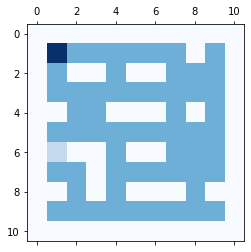

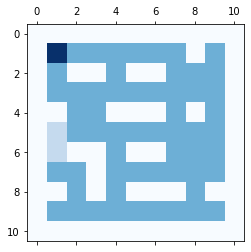

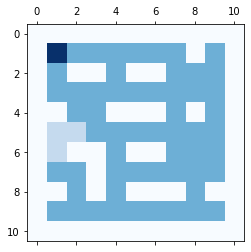

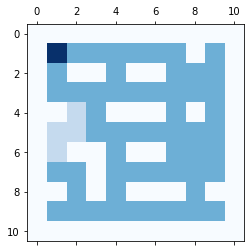

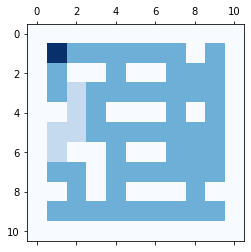

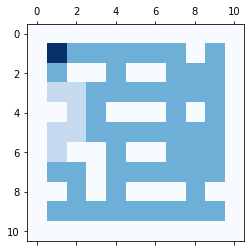

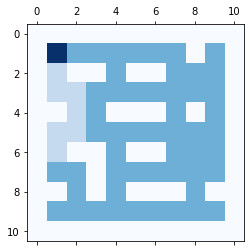

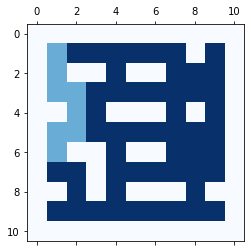

In [17]:
path = get_path(6, 1)
print(path)
show_path(path)

In the next example the boat will start at position [7,5]. At this location, in order for the boat to reach the reward it should move West then North. If the agent takes any other route it would be suboptimal.

[[7, 5], [6, 5]]


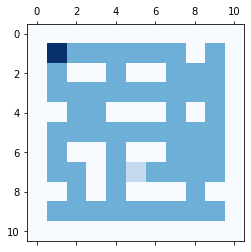

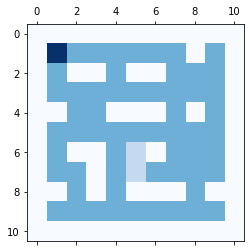

In [13]:
path = get_path(7, 5)
print(path)
show_path(path)



* In the next example, the boat will start at a random location, and will follow a path until it reaches the fishing spot.

* The boat should be able to get to the fishing spot without crashing into obstacles

* You may run this many times to see different results

[[5, 4], [5, 5], [4, 5]]


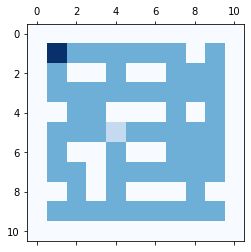

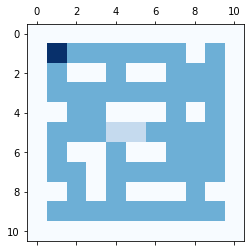

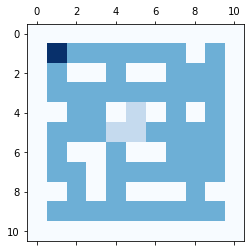

In [14]:
random_location = get_random_location()
path = get_path(random_location[0], random_location[1])
print(path)
show_path(path)

### Results Evalutaion

The agent is able to find the correct path as expected. I placed the boat behind obstacles in the first and second test and it has taken the correct path both times. After running the 3rd test multiple times where the agent is placed at rantom locations, I realised that there are locations where the agent can either take one path or another and have the same path distance. The agent will however always choose one path, the path that it knows. I've also realised that if I retrain my agent, it may sometimes take the other path that has the same distance. But, the agent will not choose a longer path.

# Bibliography

Mateev, A. , et al.(2016). Safe robot navigation among moving and steady obstacles. Amsterdam, Netherlands : Butterworth-Heinemann. Available from https://ebookcentral.proquest.com/lib/westminster/reader.action?docID=4003911 [Accessed on 10 January 2022]

Janglová, D. (2004). Neural Networks in Mobile Robot Motion. Inernational Journal of Advanced Robotic Systems, Volume 1 Number 1. Available from https://arxiv.org/ftp/cs/papers/0412/0412049.pdf [Accessed on 12 January 2022]

Stuart J. R. and Peter N. (2021). Artificial intelligence: a modern approach. Upper Saddle River: Pearson. Available from https://ebookcentral.proquest.com/lib/westminster/reader.action?docID=6563568 [Accessed on 10 January 2022]
